# Classification Modeling: KNeighborsClassifier
### Author: Ehsan Gharib-Nezhad


In [31]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.probability import FreqDist
import re
import pickle as pk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import  LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import classification_report, confusion_matrix


import random

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
# Dataset 1: Human dataset
# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [32]:
# Load datasets
human = pd.read_csv('../outputs/human_kmer_dataset.csv')

In [33]:
human.head()

,class,2mer,3mer,4mer,5mer,6mer,7mer,8mer,9mer,10mer
0,4,"['at', 'tg', 'gc', 'cc', 'cc', 'cc', 'ca', 'aa...","['atg', 'tgc', 'gcc', 'ccc', 'ccc', 'cca', 'ca...","['atgc', 'tgcc', 'gccc', 'cccc', 'ccca', 'ccaa...","['atgcc', 'tgccc', 'gcccc', 'cccca', 'cccaa', ...","['atgccc', 'tgcccc', 'gcccca', 'ccccaa', 'ccca...","['atgcccc', 'tgcccca', 'gccccaa', 'ccccaac', '...","['atgcccca', 'tgccccaa', 'gccccaac', 'ccccaact...","['atgccccaa', 'tgccccaac', 'gccccaact', 'cccca...","['atgccccaac', 'tgccccaact', 'gccccaacta', 'cc..."
1,4,"['at', 'tg', 'ga', 'aa', 'ac', 'cg', 'ga', 'aa...","['atg', 'tga', 'gaa', 'aac', 'acg', 'cga', 'ga...","['atga', 'tgaa', 'gaac', 'aacg', 'acga', 'cgaa...","['atgaa', 'tgaac', 'gaacg', 'aacga', 'acgaa', ...","['atgaac', 'tgaacg', 'gaacga', 'aacgaa', 'acga...","['atgaacg', 'tgaacga', 'gaacgaa', 'aacgaaa', '...","['atgaacga', 'tgaacgaa', 'gaacgaaa', 'aacgaaaa...","['atgaacgaa', 'tgaacgaaa', 'gaacgaaaa', 'aacga...","['atgaacgaaa', 'tgaacgaaaa', 'gaacgaaaat', 'aa..."
2,3,"['at', 'tg', 'gt', 'tg', 'gt', 'tg', 'gg', 'gc...","['atg', 'tgt', 'gtg', 'tgt', 'gtg', 'tgg', 'gg...","['atgt', 'tgtg', 'gtgt', 'tgtg', 'gtgg', 'tggc...","['atgtg', 'tgtgt', 'gtgtg', 'tgtgg', 'gtggc', ...","['atgtgt', 'tgtgtg', 'gtgtgg', 'tgtggc', 'gtgg...","['atgtgtg', 'tgtgtgg', 'gtgtggc', 'tgtggca', '...","['atgtgtgg', 'tgtgtggc', 'gtgtggca', 'tgtggcat...","['atgtgtggc', 'tgtgtggca', 'gtgtggcat', 'tgtgg...","['atgtgtggca', 'tgtgtggcat', 'gtgtggcatt', 'tg..."
3,3,"['at', 'tg', 'gt', 'tg', 'gt', 'tg', 'gg', 'gc...","['atg', 'tgt', 'gtg', 'tgt', 'gtg', 'tgg', 'gg...","['atgt', 'tgtg', 'gtgt', 'tgtg', 'gtgg', 'tggc...","['atgtg', 'tgtgt', 'gtgtg', 'tgtgg', 'gtggc', ...","['atgtgt', 'tgtgtg', 'gtgtgg', 'tgtggc', 'gtgg...","['atgtgtg', 'tgtgtgg', 'gtgtggc', 'tgtggca', '...","['atgtgtgg', 'tgtgtggc', 'gtgtggca', 'tgtggcat...","['atgtgtggc', 'tgtgtggca', 'gtgtggcat', 'tgtgg...","['atgtgtggca', 'tgtgtggcat', 'gtgtggcatt', 'tg..."
4,3,"['at', 'tg', 'gc', 'ca', 'aa', 'ac', 'ca', 'ag...","['atg', 'tgc', 'gca', 'caa', 'aac', 'aca', 'ca...","['atgc', 'tgca', 'gcaa', 'caac', 'aaca', 'acag...","['atgca', 'tgcaa', 'gcaac', 'caaca', 'aacag', ...","['atgcaa', 'tgcaac', 'gcaaca', 'caacag', 'aaca...","['atgcaac', 'tgcaaca', 'gcaacag', 'caacagc', '...","['atgcaaca', 'tgcaacag', 'gcaacagc', 'caacagca...","['atgcaacag', 'tgcaacagc', 'gcaacagca', 'caaca...","['atgcaacagc', 'tgcaacagca', 'gcaacagcat', 'ca..."


---

# Split the dataset to train and test set

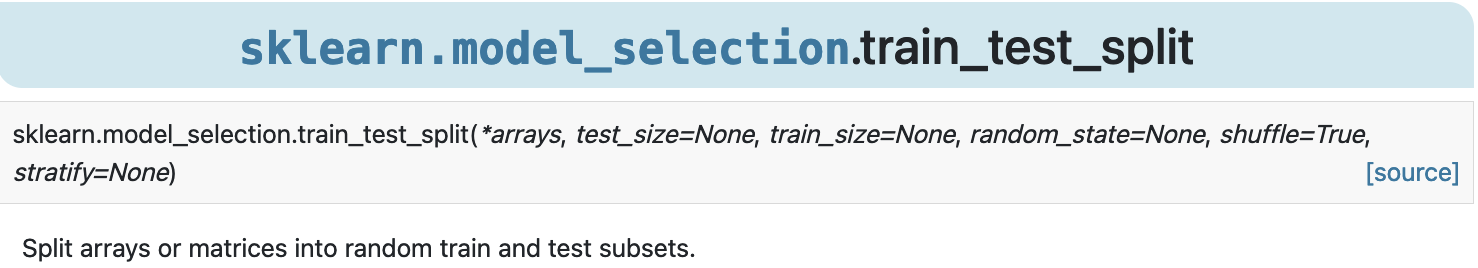
Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [46]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split( [' '.join(x.replace(" ", "")[1:-1].split(',')) 
                                                      for x in human['2mer']] , # for converting the SINGLE string to an array of strings
                                                    human['class'],
                                                    test_size=0.25,
                                                    stratify=human['class'],
                                                    random_state=42)

## Baseline Accuracy
We need to calculate baseline accuracy in order to tell if our model is better than null model.

In [47]:
print ('The train and test dataset has these following fraction of the whole data for their gene family:') 
       
pd.DataFrame(y_train).value_counts(normalize=True),pd.DataFrame(y_test).value_counts(normalize=True)

The train and test dataset has these following fraction of the whole data for their gene family:


(class
 6        0.306545
 4        0.162253
 3        0.153425
 1        0.122070
 0        0.121157
 2        0.079756
 5        0.054795
 dtype: float64,
 class
 6        0.306849
 4        0.162557
 3        0.153425
 0        0.121461
 1        0.121461
 2        0.079452
 5        0.054795
 dtype: float64)

# CountVectorizering the $k$mer dataset for the models

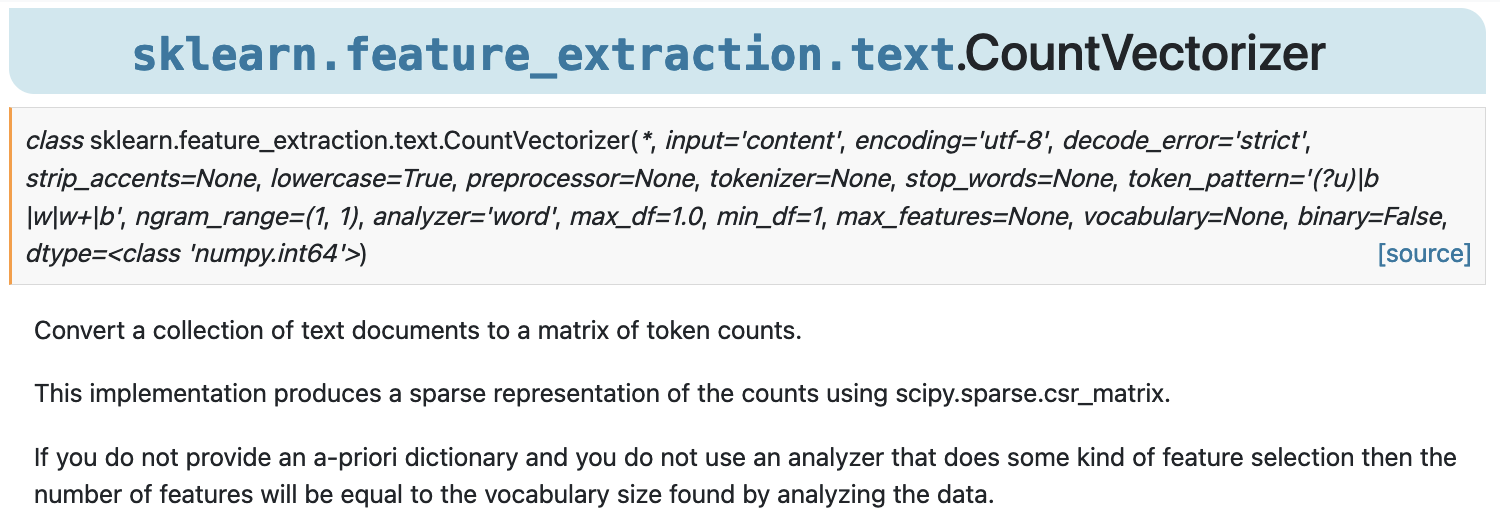
ref: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html


In [48]:
cvec = CountVectorizer(ngram_range=(4,4))

### Convert train dataset

In [49]:
# Fit & transform the vectorizer on our training corpus.
Xcv_train = cvec.fit_transform(X_train)

In [50]:
# to convert sparse matrix to dense matrix
Xcv_train = pd.DataFrame(Xcv_train.todense(),
                           columns = cvec.get_feature_names() )
Xcv_train.head()

,aa aa aa aa,aa aa aa ac,aa aa aa ag,aa aa aa at,aa aa ac ca,aa aa ac cc,aa aa ac cg,aa aa ac ct,aa aa ag ga,aa aa ag gc,...,tt tt tc cg,tt tt tc ct,tt tt tg ga,tt tt tg gc,tt tt tg gg,tt tt tg gt,tt tt tt ta,tt tt tt tc,tt tt tt tg,tt tt tt tt
0,13,9,4,6,8,3,1,5,7,2,...,1,5,4,4,6,4,6,3,5,3
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,2,0,0,2,2,0,2,2,2,...,0,0,1,1,1,1,1,1,1,3
3,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,1,0,1,0
4,7,4,10,4,2,3,2,1,8,7,...,0,5,6,4,4,3,1,6,8,2


In [51]:
Xcv_train.shape

(3285, 1222)

### Convert test dataset

In [52]:
# Transform the test corpus.
Xcv_test = cvec.transform(X_test)

In [53]:
# to convert sparse matrix to dense matrix
Xcv_test = pd.DataFrame(Xcv_test.todense(),
                           columns = cvec.get_feature_names() )
Xcv_test.head()

,aa aa aa aa,aa aa aa ac,aa aa aa ag,aa aa aa at,aa aa ac ca,aa aa ac cc,aa aa ac cg,aa aa ac ct,aa aa ag ga,aa aa ag gc,...,tt tt tc cg,tt tt tc ct,tt tt tg ga,tt tt tg gc,tt tt tg gg,tt tt tg gt,tt tt tt ta,tt tt tt tc,tt tt tt tg,tt tt tt tt
0,0,0,0,1,0,1,0,0,0,1,...,0,1,0,1,0,0,0,1,1,2
1,12,4,6,7,3,6,0,3,3,3,...,0,1,1,1,1,1,1,0,0,0
2,0,0,1,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,2,1,2,3,0,0,4,4,...,0,6,1,1,0,1,0,2,1,1
4,1,2,1,3,4,1,0,4,0,1,...,0,1,3,1,2,2,2,3,2,1


In [54]:
Xcv_test.shape

(1095, 1222)

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
# Build KNeighborsClassifier Model
# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

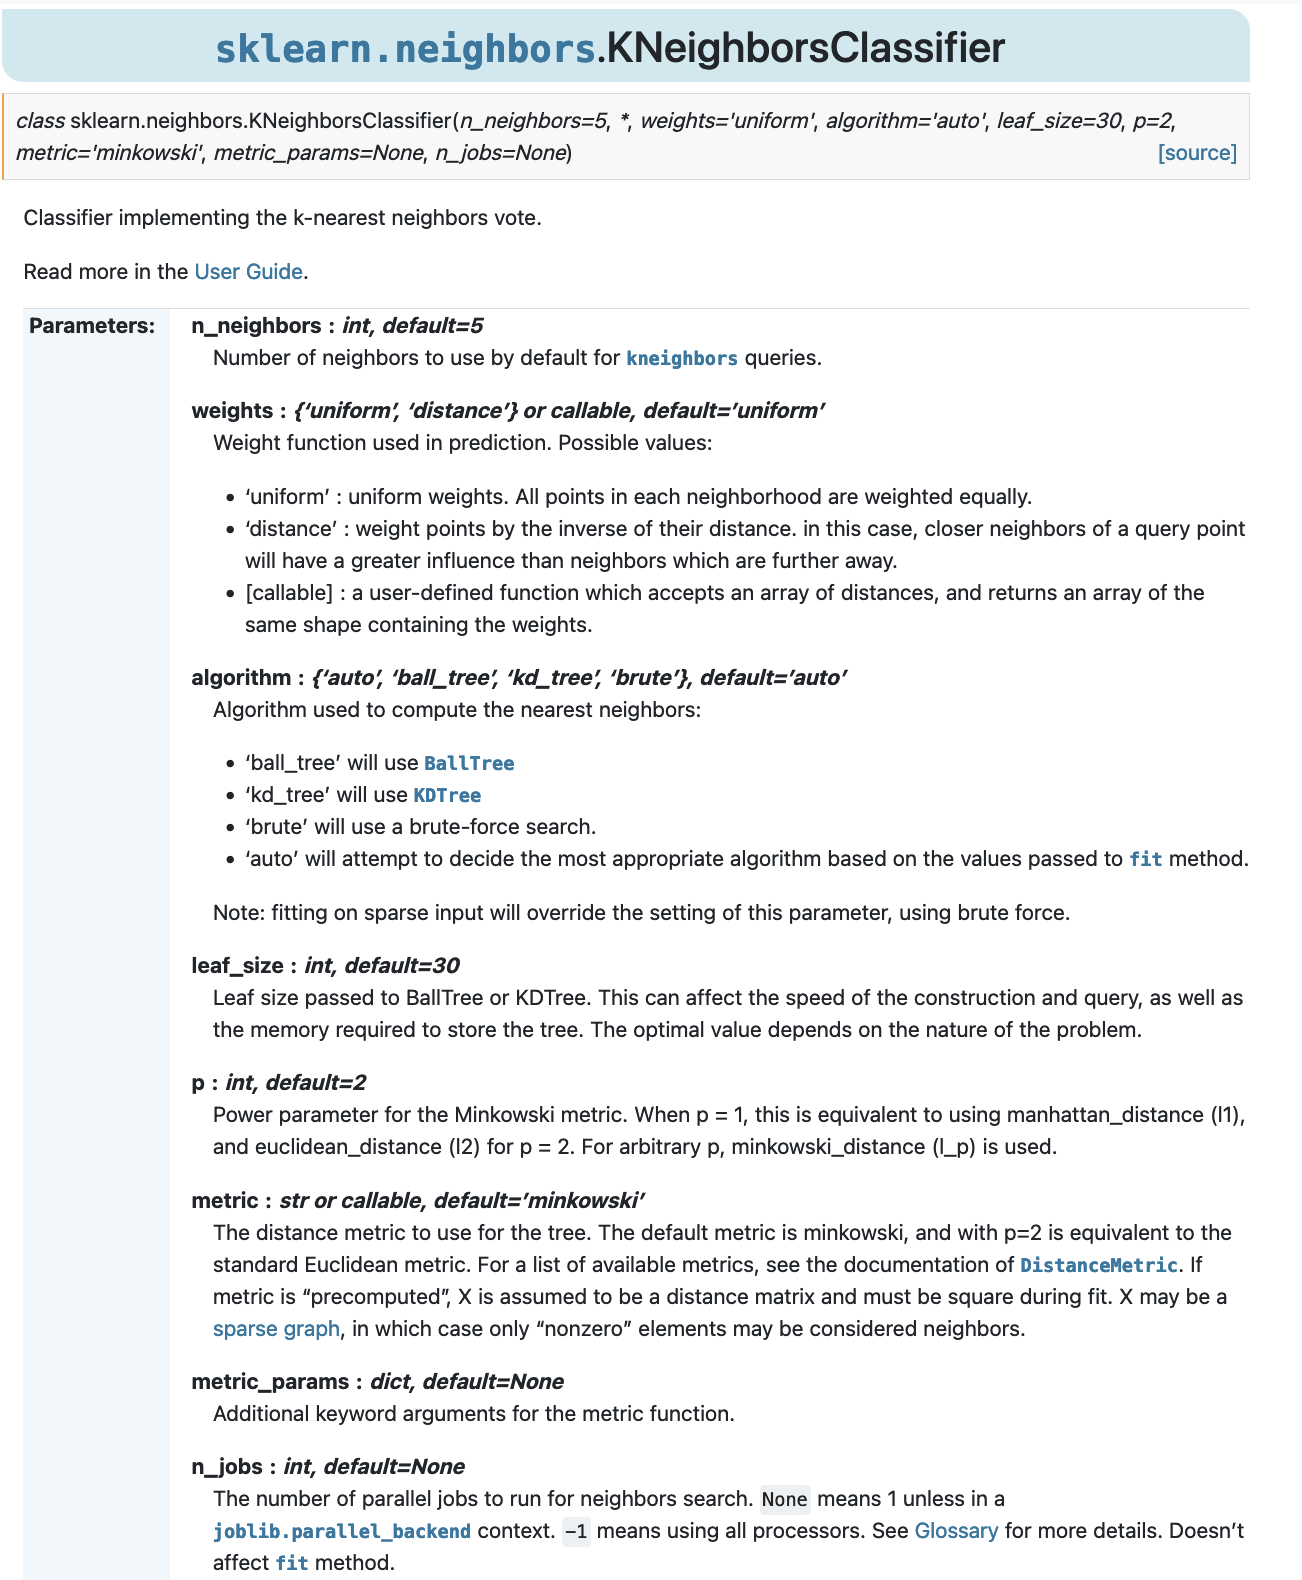

KNeighbors Ref: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

### One-vs-one multiclass strategy:

This strategy consists in fitting one classifier per class pair. At prediction time, the class which received the most votes is selected. Since it requires to fit n_classes * (n_classes - 1) / 2 classifiers, this method is usually slower than one-vs-the-rest, due to its O(n_classes^2) complexity. However, this method may be advantageous for algorithms such as kernel algorithms which don’t scale well with n_samples. This is because each individual learning problem only involves a small subset of the data whereas, with one-vs-the-rest, the complete dataset is used n_classes times.

Ref: https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html

In [56]:
#The fit method of Random Forest class is called to train the algorithm on the training data, 
#which is passed as a parameter to the fit method

KNN_model = KNeighborsClassifier()#OneVsOneClassifier(KNeighborsClassifier(),  n_jobs=-1)

KNN_model.fit(Xcv_train, y_train)

# save model
filename = f'../outputs/classification__KNeighborsClassifier_4mers.model'
pk.dump(KNN_model, open(filename, 'wb'))

In [57]:
y_pred = KNN_model.predict(Xcv_test) 

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       133
           1       0.66      0.73      0.69       133
           2       0.79      0.71      0.75        87
           3       0.78      0.76      0.77       168
           4       0.81      0.72      0.76       178
           5       0.76      0.58      0.66        60
           6       0.82      0.86      0.84       336

    accuracy                           0.77      1095
   macro avg       0.77      0.74      0.75      1095
weighted avg       0.78      0.77      0.77      1095



Normalized confusion matrix
[[0.81 0.05 0.02 0.02 0.01 0.   0.09]
 [0.04 0.73 0.01 0.07 0.05 0.01 0.11]
 [0.07 0.09 0.71 0.02 0.01 0.01 0.08]
 [0.06 0.06 0.02 0.76 0.04 0.02 0.05]
 [0.03 0.07 0.01 0.05 0.72 0.03 0.1 ]
 [0.08 0.13 0.   0.07 0.03 0.58 0.1 ]
 [0.02 0.02 0.03 0.03 0.04 0.   0.86]]


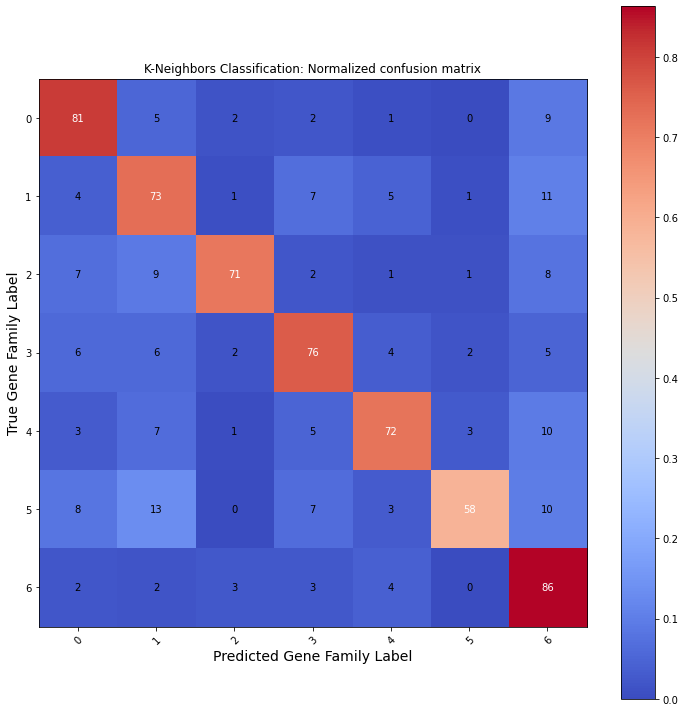

In [59]:
def plot_confusion_matrix(y_true, y_pred, 
                          classes,
                          title = None,
                          normalize = True):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap='coolwarm')
        
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.0f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j]*100, fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
#     plt.xlim(-0.5, len(np.unique(y))-0.5)
#     plt.ylim(len(np.unique(y))-0.5, -0.5)
    ax.set_xlabel('Predicted Gene Family Label', fontsize = 14)
    ax.set_ylabel('True Gene Family Label', fontsize = 14)
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
# plot_confusion_matrix(y_test, y_pred, classes=['0','1','2','3','4','5','6'],
#                       title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, 
                      classes = ['0','1','2','3','4','5','6'], 
                      title = 'K-Neighbors Classification: Normalized confusion matrix',
                      normalize = True)

plt.show()
